In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

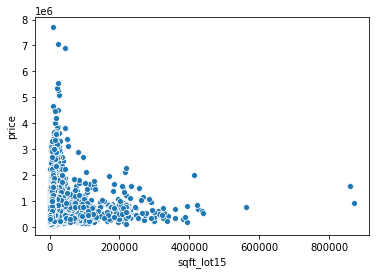

In [7]:
sns.scatterplot(x=df['sqft_lot15'],y=df['price'])

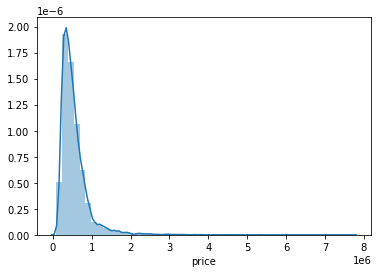

In [8]:
sns.distplot(df['price'])

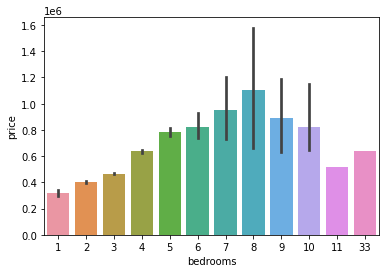

In [9]:
sns.barplot(df['bedrooms'],df['price'])

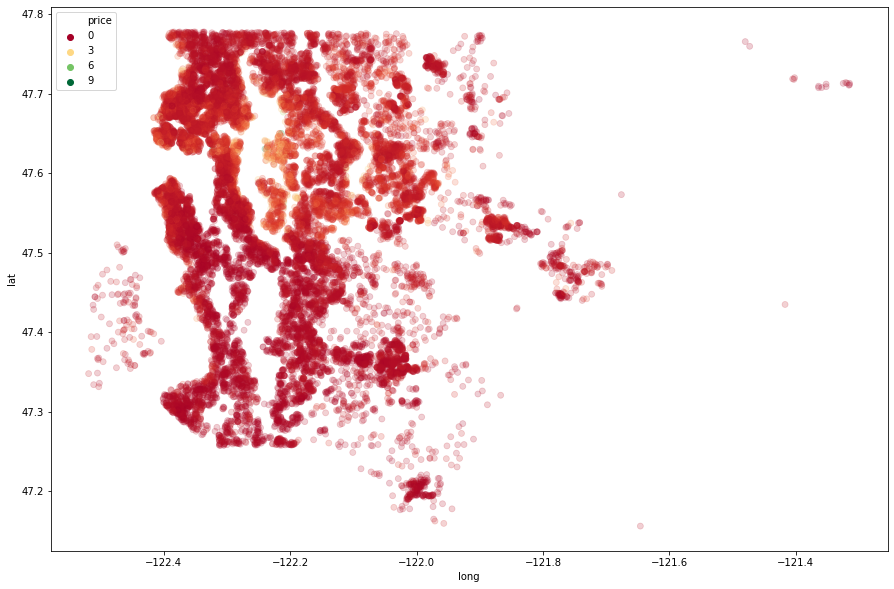

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',hue='price',edgecolor=None,palette='RdYlGn',alpha=0.2,data=df)

In [11]:
df['price'].sort_values(ascending=False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [12]:
df_after_1precent=df.sort_values('price',ascending=False).iloc[216:]

In [13]:
df_after_1precent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [14]:
df['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, Length: 21597, dtype: int64

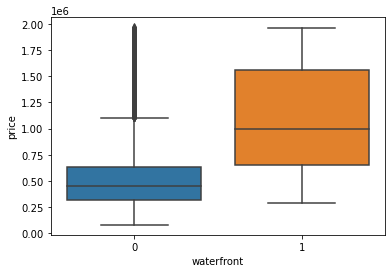

In [15]:
sns.boxplot(x='waterfront',y='price',data=df_after_1precent)

In [16]:
df['date']=pd.to_datetime(df['date'])

In [17]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [18]:
df['month']=df['date'].apply(lambda date:date.month)

In [19]:
df['year']=df['date'].apply(lambda date:date.year)

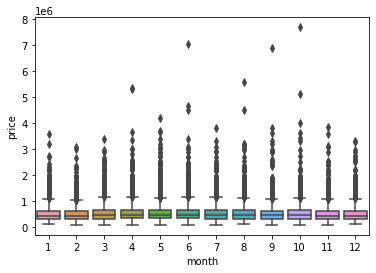

In [20]:
sns.boxplot(df['month'],df['price'])

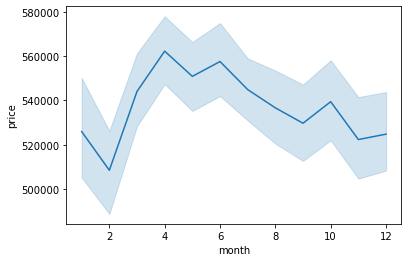

In [21]:
sns.lineplot(df['month'],df['price'])

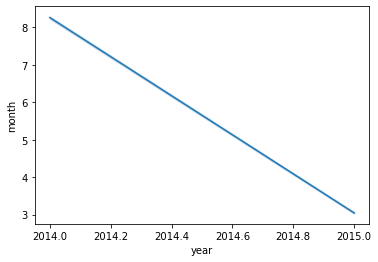

In [22]:
sns.lineplot(df['year'],df['month'])

In [23]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
month           -0.009928
year             0.003727
Name: price, dtype: float64

In [24]:
df.drop('id',axis=1,inplace=True)

In [25]:
df.drop('date',axis=1,inplace=True)

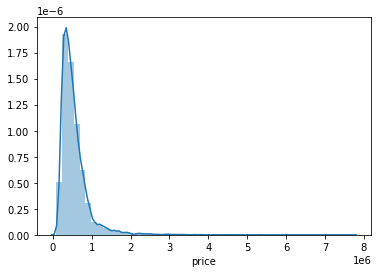

In [26]:
sns.distplot(df['price'])

In [27]:
df=df.sort_values('price')[216:]

In [28]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
4764,154000.0,2,1.00,1040,20524,1.0,0,3,3,6,...,0,1949,1989,98014,47.6981,-121.875,1880,38996,9,2014
8080,154200.0,4,1.00,1310,8640,1.0,0,0,3,6,...,400,1948,0,98146,47.5104,-122.342,1310,8640,1,2015
11844,154500.0,3,1.00,890,9465,1.0,0,0,3,6,...,0,1957,0,98148,47.4388,-122.328,1590,9147,9,2014
6104,154950.0,4,1.00,1600,10183,1.0,0,0,4,6,...,0,1966,0,98002,47.2770,-122.211,1410,10416,7,2014
15194,155000.0,3,1.50,970,8400,1.0,0,0,3,7,...,0,1966,0,98003,47.3284,-122.331,1230,8400,10,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,1280,2009,0,98004,47.6232,-122.220,4600,21750,4,2015
4407,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,8,2014
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,9,2014
3910,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,6,2014


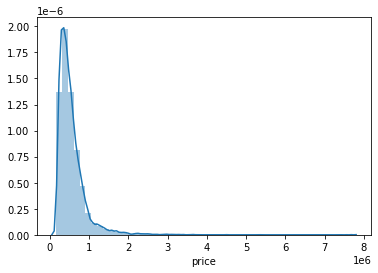

In [29]:
sns.distplot(df['price'])

(array([1.9377e+04, 1.6180e+03, 2.7200e+02, 7.7000e+01, 2.5000e+01,
        5.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 154000.,  908600., 1663200., 2417800., 3172400., 3927000.,
        4681600., 5436200., 6190800., 6945400., 7700000.]),
 <a list of 10 Patch objects>)

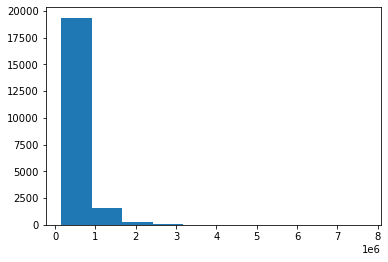

In [30]:
plt.hist(df['price'])

In [31]:
x=df.iloc[:,1:].to_numpy()
y=df.iloc[:,0].to_numpy()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [34]:
minmax.fit(x_train)

MinMaxScaler()

In [35]:
X_train=minmax.transform(x_train)
X_test=minmax.transform(x_test)

In [36]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [37]:
model=Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=128)

Epoch 1/20
134/134 [==============================] - 1s 8ms/step - loss: 437871542272.0000 - val_loss: 403445579776.0000
Epoch 2/20
134/134 [==============================] - 1s 6ms/step - loss: 436140998656.0000 - val_loss: 397174931456.0000
Epoch 3/20
134/134 [==============================] - 1s 6ms/step - loss: 409199706112.0000 - val_loss: 336481386496.0000
Epoch 4/20
134/134 [==============================] - 1s 7ms/step - loss: 288236240896.0000 - val_loss: 165546033152.0000
Epoch 5/20
134/134 [==============================] - 1s 6ms/step - loss: 134545547264.0000 - val_loss: 86229106688.0000
Epoch 6/20
134/134 [==============================] - 1s 7ms/step - loss: 104869437440.0000 - val_loss: 84175945728.0000
Epoch 7/20
134/134 [==============================] - 1s 6ms/step - loss: 102747709440.0000 - val_loss: 82514837504.0000
Epoch 8/20
134/134 [==============================] - 1s 5ms/step - loss: 100810948608.0000 - val_loss: 80971808768.0000
Epoch 9/20
134/134 [========

In [39]:
y_pred_test=model.predict(X_test)

In [40]:
y_pred_test

array([[576230.3 ],
       [688062.  ],
       [752941.44],
       ...,
       [502627.66],
       [465123.97],
       [684535.56]], dtype=float32)

In [41]:
y_test

array([479950., 475000., 750000., ..., 363750., 262000., 675000.])

In [42]:
test_pred=pd.DataFrame(y_pred_test,columns=['y_pred_test'])

In [43]:
test_pred

,y_pred_test
0,5.762303e+05
1,6.880620e+05
2,7.529414e+05
3,4.282937e+05
4,4.927343e+05
...,...
4272,3.629842e+05
4273,1.139924e+06
4274,5.026277e+05
4275,4.651240e+05


In [44]:
y_true=pd.Series(y_test)

In [45]:
test_pred=pd.concat((test_pred,y_true),axis=1)

In [46]:
test_pred.columns=['y_pred_test','y_true']

In [47]:
from sklearn.metrics import explained_variance_score

In [48]:
explained_variance_score(y_test,y_pred_test)

0.5372460535881292

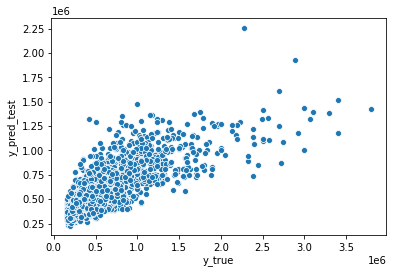

In [49]:
sns.scatterplot(test_pred['y_true'],test_pred['y_pred_test'])

In [50]:
test_pred

,y_pred_test,y_true
0,5.762303e+05,479950.0
1,6.880620e+05,475000.0
2,7.529414e+05,750000.0
3,4.282937e+05,470000.0
4,4.927343e+05,280000.0
...,...,...
4272,3.629842e+05,475000.0
4273,1.139924e+06,2380000.0
4274,5.026277e+05,363750.0
4275,4.651240e+05,262000.0


In [51]:
single_house=df.drop('price',axis=1).iloc[0]

In [52]:
single_house=single_house.values.reshape(-1,20)

In [53]:
single_house=minmax.transform(single_house)

In [54]:
single_house

array([[0.1       , 0.06666667, 0.05736301, 0.01211747, 0.        ,
        0.        , 0.75      , 0.5       , 0.3       , 0.07891637,
        0.        , 0.42608696, 0.98709677, 0.06565657, 0.87142164,
        0.53532835, 0.25932411, 0.04404692, 0.72727273, 0.        ]])

In [55]:
price_predict=model.predict(single_house)

In [56]:
price_predict

array([[826320.56]], dtype=float32)

In [57]:
df['price'][0]

221900.0

In [58]:
model.save('housing data.h5')

In [59]:
import joblib

joblib.dump(minmax,'housing data.pkl')

['housing data.pkl']

In [60]:
pd.set_option('max_columns',None)

keys=list(df.columns)

keys

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'year']

In [61]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
4764,154000.0,2,1.0,1040,20524,1.0,0,3,3,6,1040,0,1949,1989,98014,47.6981,-121.875,1880,38996,9,2014


In [62]:
values=[2,1.0,1040,20524,1.0,0,3,3,6,1040,0,1949,1989,98014,47.6981,-121.875,1880,38996,9,2014]

In [63]:
key=[]
for i in keys:
    if i=='price':
        pass
    else:
        key.append(i)

In [64]:
key

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'year']

In [65]:
dict1=dict(zip(key,values))

In [66]:


def return_prediction(model,scaler,house_data):
    bedrooms=dict1['bedrooms']
    bathrooms=dict1['bathrooms']
    sqft_living=dict1['sqft_living']
    sqft_lot=dict1['sqft_lot']
    floors=dict1['floors']
    waterfront=dict1['waterfront']
    view=dict1['view']
    condition=dict1['condition']
    grade=dict1['grade']
    sqft_above=dict1['sqft_above']
    sqft_basement=dict1['sqft_basement']
    yr_built=dict1['yr_built']
    yr_renovated=dict1['yr_renovated']
    zipcode=dict1['zipcode']
    lat=dict1['lat']
    long=dict1['long']
    sqft_living15=dict1['sqft_living15']
    sqft_lot15=dict1['sqft_lot15']
    month=dict1['month']
    year=dict1['year']
    
    data=[[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,
 sqft_above,
 sqft_basement,
 yr_built,
 yr_renovated,
 zipcode,
 lat,
 long,
 sqft_living15,
 sqft_lot15,
 month,
 year]]
    
    scaler_x=scaler.transform(data)
    
    y_pred=model.predict(scaler_x)
    
    return y_pred

In [67]:
print(return_prediction(model,minmax,dict1))

[[826320.56]]


In [68]:
dict1

{'bedrooms': 2,
 'bathrooms': 1.0,
 'sqft_living': 1040,
 'sqft_lot': 20524,
 'floors': 1.0,
 'waterfront': 0,
 'view': 3,
 'condition': 3,
 'grade': 6,
 'sqft_above': 1040,
 'sqft_basement': 0,
 'yr_built': 1949,
 'yr_renovated': 1989,
 'zipcode': 98014,
 'lat': 47.6981,
 'long': -121.875,
 'sqft_living15': 1880,
 'sqft_lot15': 38996,
 'month': 9,
 'year': 2014}